In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math 
import copy

In [41]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

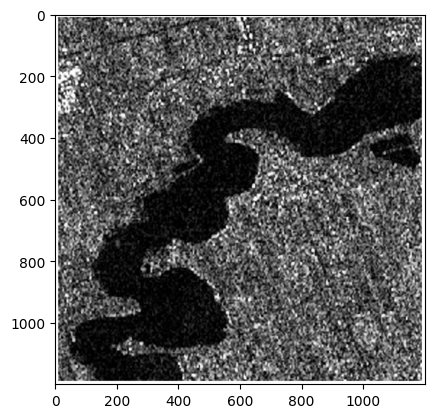

In [42]:
plt.imshow(image_gray, cmap="gray")

## Точечная бинаризация

In [43]:
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

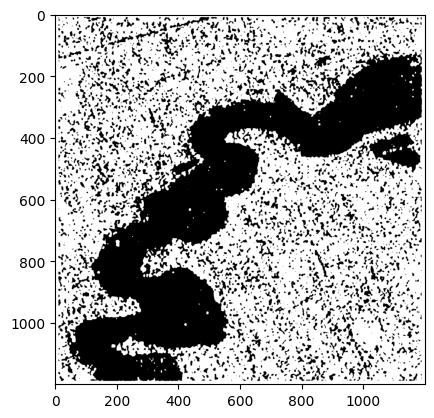

In [44]:
plt.imshow(bin_img, cmap="gray")

## Бинаризация Отсу

In [45]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

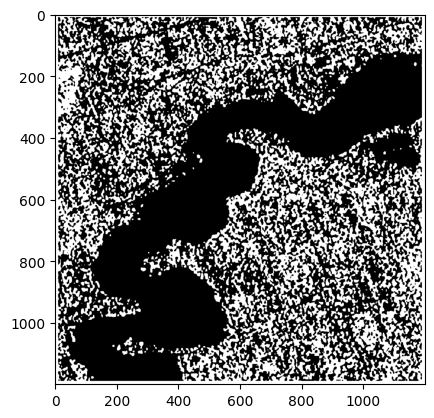

In [46]:
plt.imshow(th2, cmap="gray")

## Адаптивная бинаризация

In [47]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)

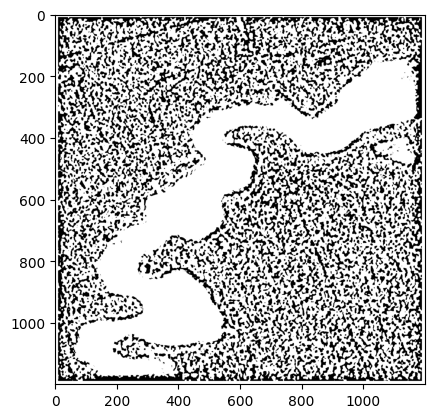

In [48]:
plt.imshow(th3, cmap="gray")

## Оператор Собеля

In [49]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

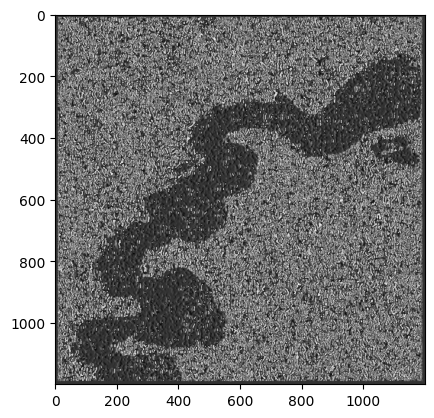

In [50]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

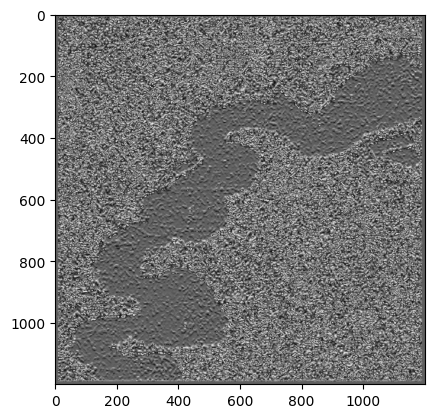

In [51]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [52]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

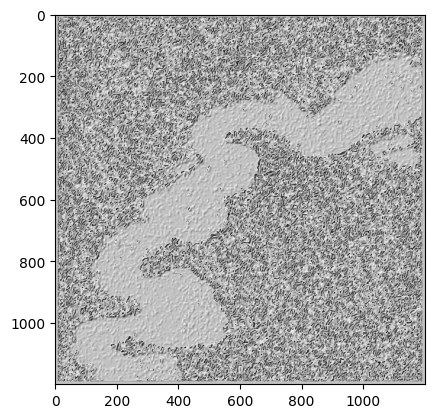

In [53]:
plt.imshow((grad - grad.min())*255, cmap="gray")

## Canny

In [54]:
edges = cv2.Canny(image_gray, 100, 200)

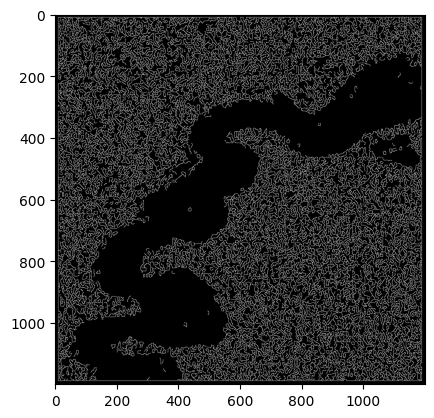

In [55]:
plt.imshow(edges, cmap="gray")

## Преобразование Хафа

In [56]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

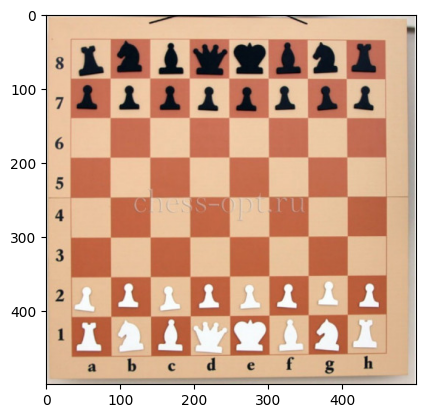

In [57]:
plt.imshow(image)

In [58]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [59]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [60]:
if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

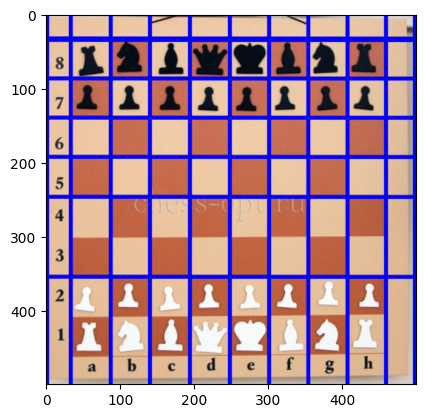

In [61]:
plt.imshow(image)

# 📋 Практическое задание по обработке изображений

В данном разделе выполняется анализ SAR-изображения `sar_3.jpg` с применением различных методов компьютерного зрения:

**Задача 1:** Детекция линейных структур
- Использование преобразования Хафа для выделения наиболее протяженных линейных элементов

**Задача 2:** Сравнительный анализ методов бинаризации  
- Исследование эффективности различных алгоритмов пороговой обработки
- Выделение и анализ участков дорожной инфраструктуры

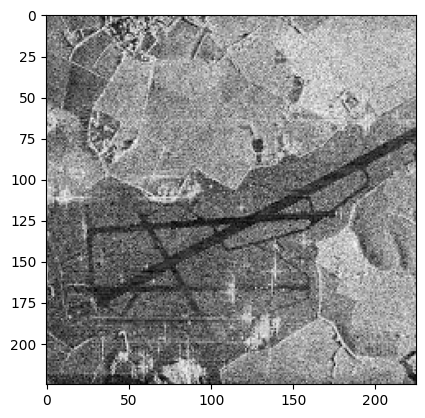

In [62]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

## 🎯 Задача 1: Детекция линейных структур

**Цель:** Выявление наиболее протяженных линейных элементов на SAR-изображении с использованием алгоритма преобразования Хафа

**Методология:**
1. Предварительная бинаризация изображения
2. Применение детектора краев Canny
3. Поиск прямых линий с помощью преобразования Хафа
4. Визуализация обнаруженных линейных структур

### 🔍 Этап 1: Подготовка данных и предобработка

Загружаем изображение и выполняем необходимую предобработку для последующего анализа

Обнаружено 1 линейных структур


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

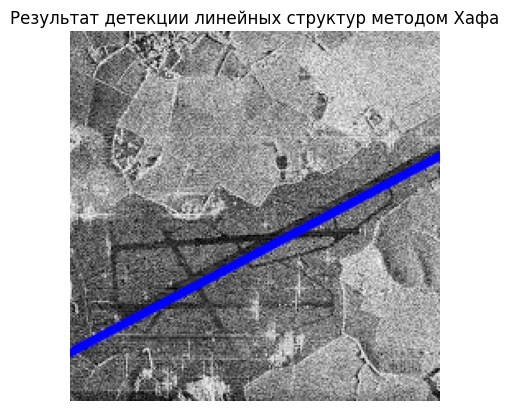

In [63]:
# Загружаем исходное SAR-изображение
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Выполняем бинаризацию для выделения основных структур
bin_img = copy.deepcopy(image_gray)
threshold_value = 80  # Пороговое значение для бинаризации
bin_img[image_gray < threshold_value] = 0
bin_img[image_gray >= threshold_value] = 255

# Применяем детектор краев Canny для выделения границ
canny_edges = cv2.Canny(bin_img, 0, 250, apertureSize=3)

# Используем преобразование Хафа для поиска прямых линий
lines = cv2.HoughLines(canny_edges, 1, np.pi / 180, 110)

# Визуализируем найденные линии на исходном изображении
if lines is not None:
    print(f"Обнаружено {len(lines)} линейных структур")
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
else:
    print("Линейные структуры не обнаружены")
        
plt.imshow(image)
plt.title('Результат детекции линейных структур методом Хафа')
plt.axis('off')

## 🔬 Задача 2: Сравнительный анализ методов бинаризации

**Цель:** Провести комплексное исследование различных алгоритмов пороговой обработки для выделения участков дорожной инфраструктуры на SAR-изображении

**Исследуемые методы:**
1. **Простая пороговая бинаризация** - базовый метод с фиксированным порогом
2. **Алгоритм Отсу** - автоматический выбор оптимального порога
3. **Адаптивная бинаризация** - локальная обработка с учетом окрестности
4. **Оператор Собеля** - выделение границ на основе градиентов
5. **Детектор Canny** - продвинутый алгоритм поиска краев

**Критерии оценки:** Качество выделения линейных структур, устойчивость к шуму, сохранение деталей

### 📊 Метод 1: Простая пороговая бинаризация

Применение фиксированного порогового значения для разделения пикселей на два класса

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

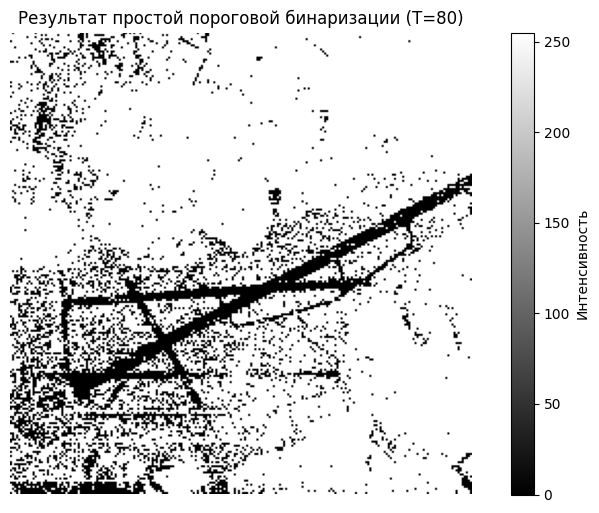

In [64]:
plt.figure(figsize=(10, 6))
plt.imshow(bin_img, cmap="gray")
plt.title(f'Результат простой пороговой бинаризации (T={threshold_value})')
plt.colorbar(label='Интенсивность')
plt.axis('off')

### 🎯 Метод 2: Алгоритм Отсу

Автоматический выбор оптимального порога на основе анализа гистограммы изображения

Автоматически выбранный порог по методу Отсу: 129.00


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

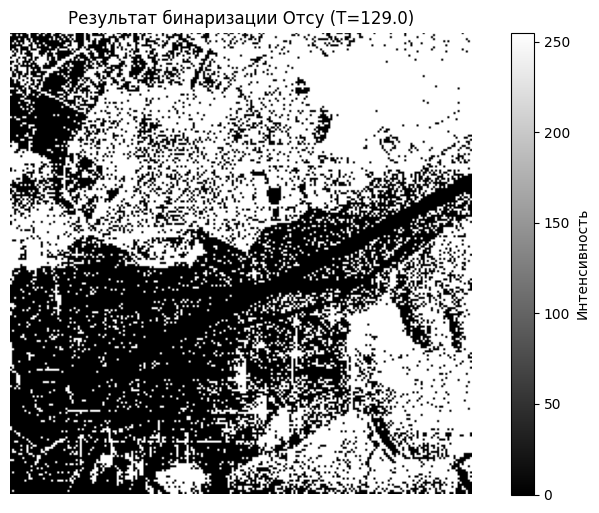

In [65]:
# Применяем алгоритм Отсу для автоматического выбора порога
optimal_threshold, otsu_result = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"Автоматически выбранный порог по методу Отсу: {optimal_threshold:.2f}")

plt.figure(figsize=(10, 6))
plt.imshow(otsu_result, cmap="gray")
plt.title(f'Результат бинаризации Отсу (T={optimal_threshold:.1f})')
plt.colorbar(label='Интенсивность')
plt.axis('off')

### 🔄 Метод 3: Адаптивная бинаризация

Локальная пороговая обработка с учетом статистических характеристик окрестности каждого пикселя

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

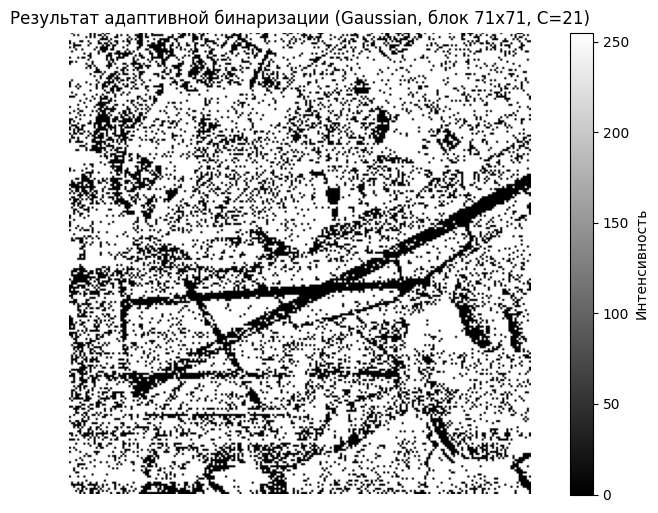

In [66]:
# Выполняем адаптивную бинаризацию с гауссовым окном
adaptive_result = cv2.adaptiveThreshold(
    image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 71, 21
)

plt.figure(figsize=(10, 6))
plt.imshow(adaptive_result, cmap="gray")
plt.title('Результат адаптивной бинаризации (Gaussian, блок 71x71, C=21)')
plt.colorbar(label='Интенсивность')
plt.axis('off')

### 📐 Метод 4: Оператор Собеля

Вычисление градиентов изображения для выделения границ и краев объектов

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

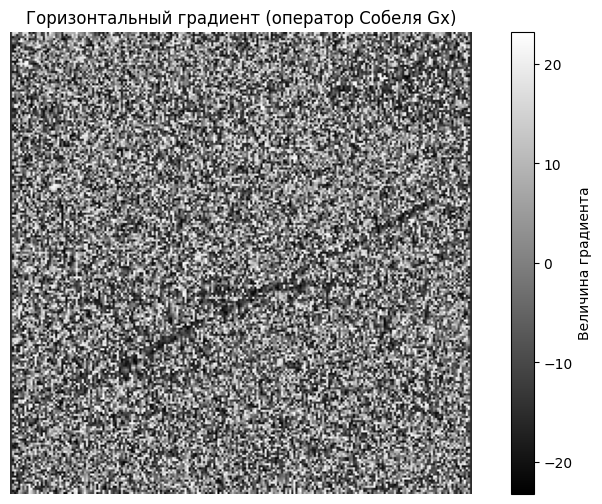

In [67]:
# Вычисляем градиенты по осям X и Y с помощью оператора Собеля
scale = 1
delta = 0
ddepth = cv2.CV_16S

# Градиент по горизонтали (Gx)
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Градиент по вертикали (Gy)  
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# Нормализуем градиент по X для визуализации
grad_x_norm = (grad_x - grad_x.min()) * 255 / (grad_x.max() - grad_x.min())

plt.figure(figsize=(10, 6))
plt.imshow(grad_x_norm, cmap="gray")
plt.title('Горизонтальный градиент (оператор Собеля Gx)')
plt.colorbar(label='Величина градиента')
plt.axis('off')

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

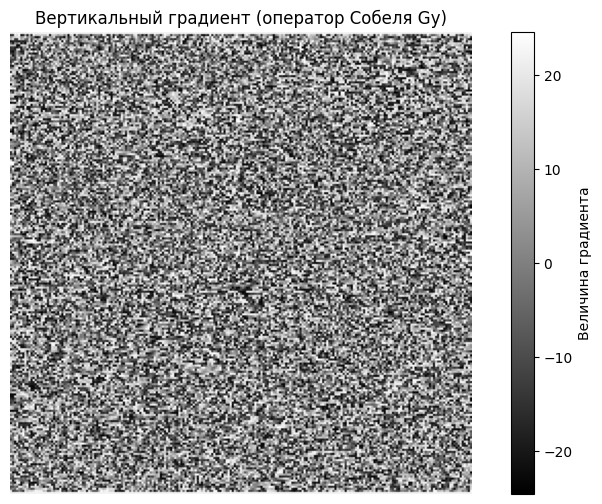

In [68]:
# Нормализуем градиент по Y для визуализации
grad_y_norm = (grad_y - grad_y.min()) * 255 / (grad_y.max() - grad_y.min())

plt.figure(figsize=(10, 6))
plt.imshow(grad_y_norm, cmap="gray")
plt.title('Вертикальный градиент (оператор Собеля Gy)')
plt.colorbar(label='Величина градиента')
plt.axis('off')

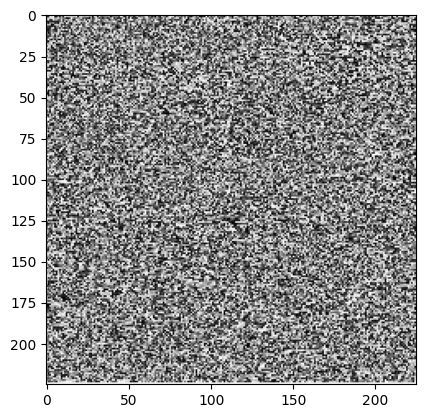

In [69]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

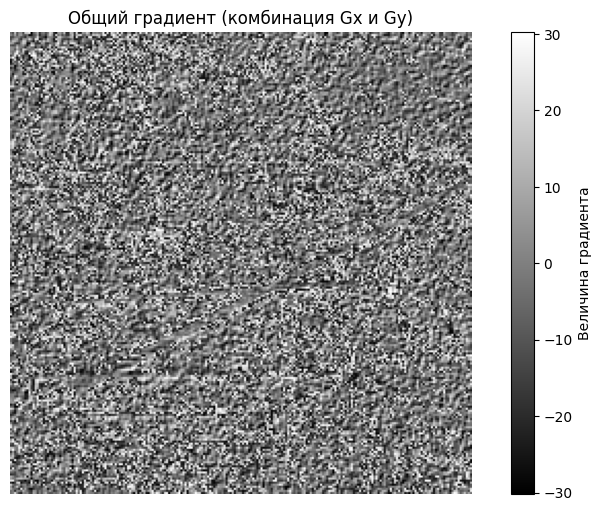

In [70]:
# Вычисляем общий градиент как комбинацию Gx и Gy
grad_magnitude = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

# Нормализуем общий градиент для визуализации
grad_magnitude_norm = (grad_magnitude - grad_magnitude.min()) * 255 / (grad_magnitude.max() - grad_magnitude.min())

plt.figure(figsize=(10, 6))
plt.imshow(grad_magnitude_norm, cmap="gray")
plt.title('Общий градиент (комбинация Gx и Gy)')
plt.colorbar(label='Величина градиента')
plt.axis('off')

### 🌊 Метод 5: Детектор краев Canny

Продвинутый алгоритм выделения краев с многоуровневой обработкой и подавлением ложных детекций

Общее количество обнаруженных краевых пикселей: 18884


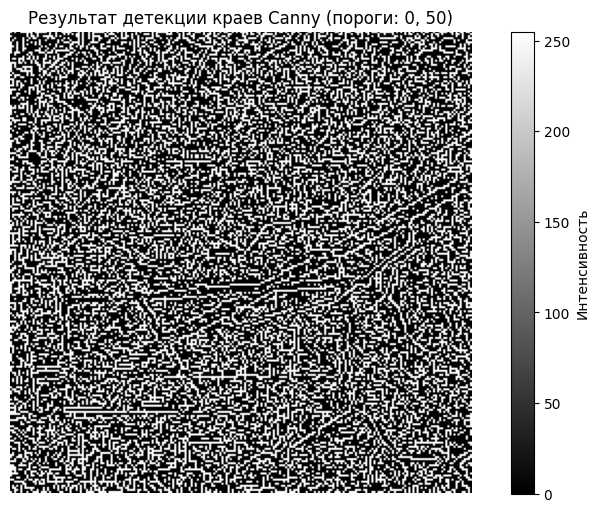

In [71]:
# Применяем детектор краев Canny с низкими порогами для детального выделения
canny_edges = cv2.Canny(image_gray, 0, 50)

plt.figure(figsize=(10, 6))
plt.imshow(canny_edges, cmap="gray")
plt.title('Результат детекции краев Canny (пороги: 0, 50)')
plt.colorbar(label='Интенсивность')
plt.axis('off')

print(f"Общее количество обнаруженных краевых пикселей: {np.sum(canny_edges > 0)}")

## 📈 Сравнительный анализ результатов

### Ключевые наблюдения:

**1. Простая пороговая бинаризация:**
- ✅ Быстрая обработка
- ❌ Чувствительна к неравномерному освещению
- ❌ Требует ручного подбора порога

**2. Алгоритм Отсу:**
- ✅ Автоматический выбор порога
- ✅ Хорошо работает с бимодальными гистограммами
- ❌ Может быть неэффективен при сложном освещении

**3. Адаптивная бинаризация:**
- ✅ Устойчива к локальным изменениям освещения
- ✅ Сохраняет детали в различных областях
- ❌ Более вычислительно затратная

**4. Оператор Собеля:**
- ✅ Эффективен для выделения границ
- ✅ Чувствителен к направлению градиентов
- ❌ Может выделять шум как границы

**5. Детектор Canny:**
- ✅ Высокое качество выделения краев
- ✅ Подавление ложных детекций
- ✅ Хорошо подходит для последующего анализа (например, преобразование Хафа)

### Рекомендации для SAR-изображений:
Для анализа дорожной инфраструктуры на SAR-изображениях наиболее эффективным является **комбинированный подход**: адаптивная бинаризация для предобработки + детектор Canny для выделения краев + преобразование Хафа для поиска линейных структур.
